In [155]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [156]:
dataset=pd.read_csv("Social_Network_Ads.csv")
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [157]:
dataset=pd.get_dummies(dataset,drop_first=True)
dataset

,User ID,Age,EstimatedSalary,Purchased,Gender_Male
0,15624510,19,19000,0,True
1,15810944,35,20000,0,True
2,15668575,26,43000,0,False
3,15603246,27,57000,0,False
4,15804002,19,76000,0,True
...,...,...,...,...,...
395,15691863,46,41000,1,False
396,15706071,51,23000,1,True
397,15654296,50,20000,1,False
398,15755018,36,33000,0,True


In [158]:
dataset=dataset.drop("User ID",axis=1)

In [159]:
dataset["Purchased"].value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

In [160]:
#indep=dataset[["Age","EstimatedSalary","Gender_Male"]]
indep=dataset[["Age","EstimatedSalary"]]
dep=dataset["Purchased"]

In [161]:
print(indep.shape)
indep


(400, 2)


,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [162]:
dep


0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [163]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(indep, dep, test_size = 1/3, random_state = 0)

In [ ]:
'''Def: KNeighborsClassifier
KNeighborsClassifier is a class in scikit-learn used for classification tasks based on the k-nearest neighbors (KNN) algorithm. 
KNN is a simple, yet effective, supervised learning algorithm used for both classification and regression tasks.
In classification, when you want to predict the class of a sample, KNN finds the k closest training examples (neighbors) in the feature space 
and assigns the most common class label among those neighbors to the sample being predicted. 
The choice of k, the number of neighbors to consider, is a hyperparameter that can be tuned based on the specific problem.'''

In [164]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 7, leaf_size=30,weights='uniform', algorithm='auto',  metric = 'canberra', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='canberra', n_neighbors=7)

In [165]:
y_pred = classifier.predict(X_test)

In [166]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [167]:
print(cm)

[[80  5]
 [ 6 43]]


In [168]:
from sklearn.metrics import classification_report,accuracy_score,f1_score
clf_report = classification_report(y_test, y_pred)

In [169]:
print(clf_report)

              precision    recall  f1-score   support

           0       0.93      0.94      0.94        85
           1       0.90      0.88      0.89        49

    accuracy                           0.92       134
   macro avg       0.91      0.91      0.91       134
weighted avg       0.92      0.92      0.92       134



In [170]:
accuracy=accuracy_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
print("Accuracy score is              : ",accuracy)
print("F1 score for purchased class is: ",f1)

Accuracy score is              :  0.917910447761194
F1 score for purchased class is:  0.8865979381443299


In [171]:
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_classification
# Create instance of KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=7)

In [172]:
classifier.fit(indep, dep)

KNeighborsClassifier(n_neighbors=7)

In [173]:
print("Shape of X:", indep.shape)

Shape of X: (400, 2)


In [174]:
def plot_decision_boundary(indep, dep, classifier):
    h = 0.5  # Adjust the step size
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    indep_min, indep_max = indep.iloc[:, 0].min() - 1, indep.iloc[:, 0].max() + 1
    dep_min, dep_max = indep.iloc[:, 1].min() - 1, indep.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(indep_min, indep_max, h),
                         np.arange(dep_min, dep_max, h))
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    plt.scatter(indep.iloc[:, 0], indep.iloc[:, 1], c=dep, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class Purchased or Not classification (k = %i)"
              % (classifier.n_neighbors))
    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')
    plt.show()

C:\Users\Prabakaran J\.conda\envs\VEAI\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


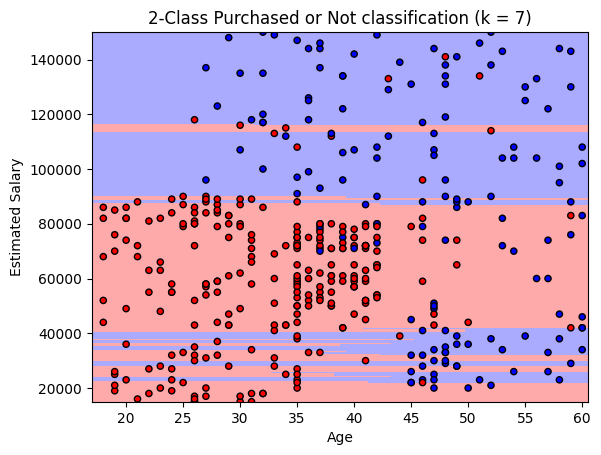

In [175]:
plot_decision_boundary(indep, dep, classifier)

In [ ]:
'''Explanation of the code:

The function plot_decision_boundary takes three arguments: indep (independent variables), dep (dependent variable), and classifier (the trained classifier).
It adjusts the step size h for creating the meshgrid. Smaller values of h lead to a denser meshgrid and potentially more detailed plots, but also require more memory and computation time.
It defines two colormaps (cmap_light and cmap_bold) for the decision regions and data points, respectively.
It determines the minimum and maximum values for the independent and dependent variables to define the plot limits.
It creates a meshgrid of points (xx, yy) using np.meshgrid.
It predicts the class labels for each point in the meshgrid using the trained classifier.
It reshapes the predictions to match the meshgrid shape.
It plots the decision regions (Z) using plt.pcolormesh.
It plots the data points (indep) using plt.scatter.
It sets the limits for the x and y axes and labels them accordingly.
It sets the title of the plot based on the number of neighbors in the classifier.
Finally, it displays the plot using plt.show().
This function allows you to visualize the decision boundary created by the classifier along with the actual data points in the feature space. Adjusting parameters such as h, colormap, and axis labels can help customize the plot according to your preferences.'''